In [15]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np, histogram.hdf as hh, histogram as H
from scipy.special import erf
from scipy.optimize import minimize,curve_fit
from lmfit import Model

In [16]:
mcvineSol='/home/fi0/simulations/ARCS/powder-res-demo_1/res-sim/iqe.h5'

In [17]:
RF= hh.load(mcvineSol)

plot z in (0, 6.05300124953e-07)


<IPython.core.display.Javascript object>


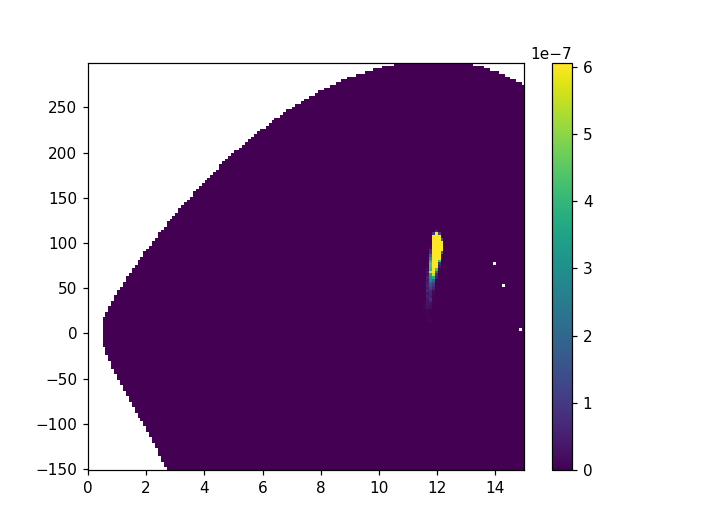

In [18]:
H.plot(RF, min=0)

In [40]:
ie = RF[(6,13), (-50,200)].sum('Q')

<IPython.core.display.Javascript object>


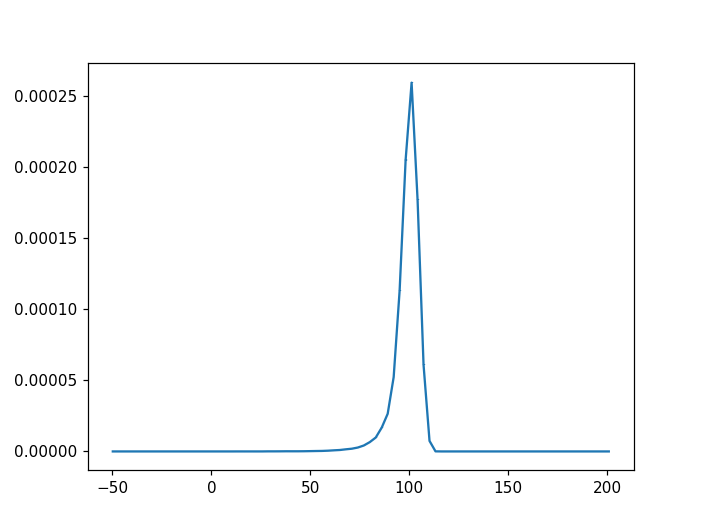

In [41]:
H.plot(ie)

[[Model]]
    (Model(gaussian) * Model(error))
[[Fit Statistics]]
    # function evals   = 38
    # data points      = 84
    # variables        = 3
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -2068.348
    Bayesian info crit = -2061.055
[[Variables]]
    amp:   0.00269436 +/- 3.65e-05 (1.35%) (init= 0.00025)
    cen:   100.390748 +/- 0.066319 (0.07%) (init= 100)
    wid:   4.24206090 +/- 0.066319 (1.56%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(amp, wid)                  =  0.577 



<IPython.core.display.Javascript object>


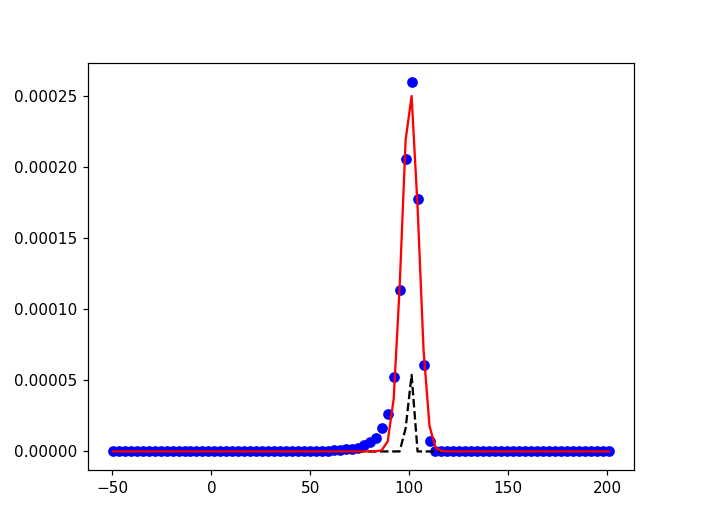

In [46]:

x = ie.E
y = ie.I

def gaussian(x, amp, cen, wid):
    "1-d gaussian: gaussian(x, amp, cen, wid)"
    return (amp/(np.sqrt(2*np.pi)*wid)) * np.exp(-(x-cen)**2 /(2*wid**2))

def error(x):
    "1-d error: error(x)"
    return erf(x)

mod = Model(gaussian) * Model(error)
pars  = mod.make_params( amp=0.00025, cen=100, wid=1)

result = mod.fit(y, pars, x=x)

print(result.fit_report())

plt.plot(x, y,         'bo')
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.show()
#print(result.best_fit)

In [47]:
comps = result.eval_components(x=x)

In [48]:
# plt.plot(x,comps['gaussian'])
# plt.plot(x,comps['error'])
# plt.show()